<a href="https://colab.research.google.com/github/EugeniaBar/-Proyecto-Procesamiento-del-Habla---ISPC---2025/blob/main/ProcHablayModelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


Proyecto Procesamiento del Habla - ISPC - 2025

*   Laura Peralta
*   Federico Gurrea
*   Marcelo Molina
*   Javier Pagano
*   Julieta Battauz
*   Eugenia Barozzi


---




In [1]:
from google.colab import files

# Subir dataset
uploaded = files.upload()

Saving IMDB Dataset SPANISH.csv to IMDB Dataset SPANISH.csv


In [2]:
import pandas as pd

df = pd.read_csv('IMDB Dataset SPANISH.csv')
df.head()

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   50000 non-null  int64 
 1   review_en    50000 non-null  object
 2   review_es    50000 non-null  object
 3   sentiment    50000 non-null  object
 4   sentimiento  50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [3]:
# Columna de sentimiento
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [4]:
# Reseñas en español
df['review_es'].sample(5, random_state=42)

,review_es
33553,Realmente me gustó este verano debido a la apa...
9427,No hay muchos programas de televisión que apel...
199,La película llega rápidamente a una escena pri...
12447,¡Jane Austen definitivamente aprobaría este! G...
39489,Las expectativas eran un poco altas para mí cu...


### Limpieza de Texto con Expresiones Regulares (Regex)

En esta sección preprocesamos el texto original de las reseñas utilizando expresiones regulares. Este paso es fundamental para preparar el texto antes de realizar análisis más avanzados. Se realiza la limpieza en etapas, mostrando el resultado intermedio después de cada una de ellas:

1. **Eliminación de signos de puntuación y caracteres especiales:** se eliminan elementos como comas, puntos, signos de exclamación, etc., que no aportan valor semántico en este contexto.
2. **Conversión a minúsculas:** todas las letras se convierten a minúsculas para unificar la representación de las palabras.
3. **Eliminación de espacios en blanco adicionales:** se remueven espacios múltiples y se limpian los espacios al inicio y al final de cada texto.
4. **Eliminación de acentos (opcional):** se normalizan los caracteres acentuados para evitar duplicaciones de palabras equivalentes con y sin tilde.

Este proceso permite obtener una versión más limpia y uniforme de las reseñas, facilitando la tokenización y el análisis posterior.


In [5]:
!pip install unidecode
#ejecutar solo para instalar la librería

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 12.9 MB/s eta 0:00:00


In [6]:
# importamos las librerías necesarias
import re
import pandas as pd
from unidecode import unidecode

In [7]:
# eliminamos signos de puntuación y caracteres especiales
df['review_sin_puntuacion'] = df['review_es'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# muestra comparativa
print("Paso 1: Eliminación de signos de puntuación y caracteres especiales")
display(df[['review_es', 'review_sin_puntuacion']].sample(3, random_state=1))

Paso 1: Eliminación de signos de puntuación y caracteres especiales


,review_es,review_sin_puntuacion
26247,"Sin héroes muertos, se obtienen líneas estúpid...",Sin héroes muertos se obtienen líneas estúpida...
35067,Pensé que tal vez ... tal vez esto podría ser ...,Pensé que tal vez tal vez esto podría ser bue...
34590,"Un equipo militar de élite americano que, por ...",Un equipo militar de élite americano que por s...


In [8]:
# convertimos a minúsculas
df['review_minusculas'] = df['review_sin_puntuacion'].apply(lambda x: x.lower())

# muestra comparativa
print("Paso 2: Conversión a minúsculas")
display(df[['review_sin_puntuacion', 'review_minusculas']].sample(3, random_state=2))

Paso 2: Conversión a minúsculas


,review_sin_puntuacion,review_minusculas
23656,Ron Hall saca una triple amenaza mientras escr...,ron hall saca una triple amenaza mientras escr...
27442,El primero en la serie fue brillante fácilment...,el primero en la serie fue brillante fácilment...
40162,Me encantó esta película porque Bobbie Phillip...,me encantó esta película porque bobbie phillip...


In [9]:
# eliminamos espacios en blanco
df['review_espacios_limpios'] = df['review_minusculas'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# muestra comparativa
print("Paso 3: Eliminación de espacios en blanco")
display(df[['review_minusculas', 'review_espacios_limpios']].sample(3, random_state=3))

Paso 3: Eliminación de espacios en blanco


,review_minusculas,review_espacios_limpios
35437,chris y andre son dos adolescentes promedio or...,chris y andre son dos adolescentes promedio or...
16296,robin williams muestra sus talentos de pie y a...,robin williams muestra sus talentos de pie y a...
23122,no puedo creer que hagan este tipo de suciedad...,no puedo creer que hagan este tipo de suciedad...


In [10]:
# eliminamos acentos
df['review_sin_acentos'] = df['review_espacios_limpios'].apply(lambda x: unidecode(x))

# muestra comparativa
print("Paso 4: Eliminación de acentos (opcional)")
display(df[['review_espacios_limpios', 'review_sin_acentos']].sample(3, random_state=4))

Paso 4: Eliminación de acentos (opcional)


,review_espacios_limpios,review_sin_acentos
16477,a primera vista del lema de la trama pensé que...,a primera vista del lema de la trama pense que...
5969,buen señor cómo terminó esto en nuestro reprod...,buen senor como termino esto en nuestro reprod...
46459,dos hechiceros luchan en la cuarta dimensión u...,dos hechiceros luchan en la cuarta dimension u...


In [11]:
# mostramos las 10 primeras filas de todas las etapas del preprocesamiento
df[['review_es',
    'review_sin_puntuacion',
    'review_minusculas',
    'review_espacios_limpios',
    'review_sin_acentos']].head(10)

,review_es,review_sin_puntuacion,review_minusculas,review_espacios_limpios,review_sin_acentos
0,Uno de los otros críticos ha mencionado que de...,Uno de los otros críticos ha mencionado que de...,uno de los otros críticos ha mencionado que de...,uno de los otros críticos ha mencionado que de...,uno de los otros criticos ha mencionado que de...
1,Una pequeña pequeña producción.La técnica de f...,Una pequeña pequeña producciónLa técnica de fi...,una pequeña pequeña producciónla técnica de fi...,una pequeña pequeña producciónla técnica de fi...,una pequena pequena produccionla tecnica de fi...
2,Pensé que esta era una manera maravillosa de p...,Pensé que esta era una manera maravillosa de p...,pensé que esta era una manera maravillosa de p...,pensé que esta era una manera maravillosa de p...,pense que esta era una manera maravillosa de p...
3,"Básicamente, hay una familia donde un niño peq...",Básicamente hay una familia donde un niño pequ...,básicamente hay una familia donde un niño pequ...,básicamente hay una familia donde un niño pequ...,basicamente hay una familia donde un nino pequ...
4,"El ""amor en el tiempo"" de Petter Mattei es una...",El amor en el tiempo de Petter Mattei es una p...,el amor en el tiempo de petter mattei es una p...,el amor en el tiempo de petter mattei es una p...,el amor en el tiempo de petter mattei es una p...
5,Probablemente mi película favorita de todos lo...,Probablemente mi película favorita de todos lo...,probablemente mi película favorita de todos lo...,probablemente mi película favorita de todos lo...,probablemente mi pelicula favorita de todos lo...
6,Seguro que me gustaría ver una resurrección de...,Seguro que me gustaría ver una resurrección de...,seguro que me gustaría ver una resurrección de...,seguro que me gustaría ver una resurrección de...,seguro que me gustaria ver una resurreccion de...
7,"Este espectáculo fue una idea increíble, fresc...",Este espectáculo fue una idea increíble fresca...,este espectáculo fue una idea increíble fresca...,este espectáculo fue una idea increíble fresca...,este espectaculo fue una idea increible fresca...
8,Alentados por los comentarios positivos sobre ...,Alentados por los comentarios positivos sobre ...,alentados por los comentarios positivos sobre ...,alentados por los comentarios positivos sobre ...,alentados por los comentarios positivos sobre ...
9,"Si te gusta la risa original desgarradora, te ...",Si te gusta la risa original desgarradora te g...,si te gusta la risa original desgarradora te g...,si te gusta la risa original desgarradora te g...,si te gusta la risa original desgarradora te g...


### Tokenización de Texto

La tokenización es el proceso de dividir un texto en unidades más pequeñas llamadas *tokens*, que generalmente corresponden a palabras. Este paso es esencial para el análisis posterior como el conteo de palabras o la creación de modelos de representación de texto. En esta sección se aplicarán tres enfoques diferentes:

1. **Tokenización simple:** división básica del texto utilizando espacios como separadores.

2. **Tokenización con NLTK:** se usa la biblioteca NLTK que proporciona herramientas específicas para el idioma español. NLTK generalmente maneja bien los caracteres especificos del español como ? y ! , separandolos como tokens individuales. sin embargo se puede referenciar la discusion sobre posibles ajustes paratokenizadores especificos del español si es necesario.

3. **Tokenización con scikit-learn (CountVectorizer):** permite tokenizar y vectorizar simultáneamente, generando una representación numérica del texto.
 A diferencia de otros métodos que primero tokenizan y luego vectorizan, CountVectorizer hace ambas cosas al mismo tiempo:

   3.1  Primero tokeniza el texto por espacios y puntuación.

    3.2 Luego cuenta cuántas veces aparece cada token.

Cada método será aplicado sobre las reseñas limpias y se compararán los resultados para observar cómo manejan signos de puntuación, palabras compuestas y caracteres especiales.


In [12]:
# Tokenización simple
df['tokens_simple'] = df['review_sin_acentos'].apply(lambda x: x.split())

# muestra
print("Tokenización simple (primeras 3 reseñas):")
df[['review_sin_acentos', 'tokens_simple']].head(25)


Tokenización simple (primeras 3 reseñas):


,review_sin_acentos,tokens_simple
0,uno de los otros criticos ha mencionado que de...,"[uno, de, los, otros, criticos, ha, mencionado..."
1,una pequena pequena produccionla tecnica de fi...,"[una, pequena, pequena, produccionla, tecnica,..."
2,pense que esta era una manera maravillosa de p...,"[pense, que, esta, era, una, manera, maravillo..."
3,basicamente hay una familia donde un nino pequ...,"[basicamente, hay, una, familia, donde, un, ni..."
4,el amor en el tiempo de petter mattei es una p...,"[el, amor, en, el, tiempo, de, petter, mattei,..."
5,probablemente mi pelicula favorita de todos lo...,"[probablemente, mi, pelicula, favorita, de, to..."
6,seguro que me gustaria ver una resurreccion de...,"[seguro, que, me, gustaria, ver, una, resurrec..."
7,este espectaculo fue una idea increible fresca...,"[este, espectaculo, fue, una, idea, increible,..."
8,alentados por los comentarios positivos sobre ...,"[alentados, por, los, comentarios, positivos, ..."
9,si te gusta la risa original desgarradora te g...,"[si, te, gusta, la, risa, original, desgarrado..."


In [13]:
# Tokenización con NLTK
# instalamos e importamos NLTK
!pip install nltk
import nltk
from nltk.tokenize import TweetTokenizer

In [14]:
# instanciamos el tokenizador
tknzr = TweetTokenizer()

# aplicar a la columna
df['tokens_nltk'] = df['review_sin_acentos'].apply(lambda x: tknzr.tokenize(x))

# muestra
df[['review_sin_acentos', 'tokens_nltk']].head(25)

,review_sin_acentos,tokens_nltk
0,uno de los otros criticos ha mencionado que de...,"[uno, de, los, otros, criticos, ha, mencionado..."
1,una pequena pequena produccionla tecnica de fi...,"[una, pequena, pequena, produccionla, tecnica,..."
2,pense que esta era una manera maravillosa de p...,"[pense, que, esta, era, una, manera, maravillo..."
3,basicamente hay una familia donde un nino pequ...,"[basicamente, hay, una, familia, donde, un, ni..."
4,el amor en el tiempo de petter mattei es una p...,"[el, amor, en, el, tiempo, de, petter, mattei,..."
5,probablemente mi pelicula favorita de todos lo...,"[probablemente, mi, pelicula, favorita, de, to..."
6,seguro que me gustaria ver una resurreccion de...,"[seguro, que, me, gustaria, ver, una, resurrec..."
7,este espectaculo fue una idea increible fresca...,"[este, espectaculo, fue, una, idea, increible,..."
8,alentados por los comentarios positivos sobre ...,"[alentados, por, los, comentarios, positivos, ..."
9,si te gusta la risa original desgarradora te g...,"[si, te, gusta, la, risa, original, desgarrado..."


*explicacion: Tokenización usando CountVectorizer de scikit-learn, que además de dividir el texto en tokens, lo convierte en una matriz numérica (Bolsa de Palabras - BoW)*

In [15]:
# Tokenización con CountVectorizer (scikit-learn)
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# instanciamos el vectorizador
vectorizador = CountVectorizer()

# aplicamos fit y transform para generar la matriz BoW
X = vectorizador.fit_transform(df['review_sin_acentos'])

# extraemos los tokens identificados por el vectorizador
tokens_sklearn = vectorizador.get_feature_names_out()

# muestra
print("Primeros 30 tokens detectados por CountVectorizer:")
print(tokens_sklearn[:100])


Primeros 30 tokens detectados por CountVectorizer:
['00' '000' '0000000000001' '00000001' '000001' '0001' '00015' '001' '002'
 '00383042' '006' '0069' '007' '0079' '007que' '007s' '007the' '007un'
 '0080' '0083' '009' '00agentes' '00s' '00schneiderandreas' '01' '010'
 '010606' '010707' '010de' '010guina' '010la' '010no' '0110' '0126' '0130'
 '01mark' '02' '0205' '0230' '029' '02i' '02year' '03' '030' '030502'
 '03092005' '0310' '0317a01511text' '039' '03oct2009' '04' '04082007'
 '041' '044' '048' '04mark' '05' '0510' '053105' '06' '060241' '0615'
 '06birtis' '07' '075' '079' '07he' '07kiloton' '08' '080702la' '081006'
 '0815' '087lol' '089' '08john' '08los' '08o' '09' '09082009' '091505'
 '0956' '09sindediner' '0alquile' '0de' '0elstoryline' '0f' '0lock' '0oh'
 '0r' '0s' '0sahora' '0simplemente' '0ttmay' '10' '100' '1000' '10000'
 '100000' '1000000' '10000000']


### Comparación de Métodos de Tokenización

A continuación, se comparan los resultados obtenidos al aplicar tres métodos distintos de tokenización sobre una misma reseña:

1. **Tokenización Simple:** divide el texto usando espacios como delimitadores. Es rápida y fácil de implementar, pero no considera puntuación ni estructuras lingüísticas.
2. **Tokenización con NLTK (`TweetTokenizer`):** separa correctamente signos de puntuación y palabras, ofreciendo una segmentación más precisa. Es adecuada para textos informales y no requiere recursos externos.
3. **Tokenización con `CountVectorizer` de scikit-learn:** tokeniza y vectoriza al mismo tiempo, generando un vocabulario basado en frecuencia. No conserva el orden de los tokens y elimina los duplicados.

Esta comparación permite observar cómo cada método maneja elementos como puntuación, tildes y signos especiales, lo cual impactará en etapas posteriores como el conteo de palabras y el modelado.


In [18]:
from IPython.display import display
import pandas as pd
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer

# elegimos una reseña
index = 3  # Podés cambiar el índice para ver otras reseñas
texto = df.loc[index, 'review_sin_acentos']

# tokenización simple
tokens_simple = texto.split()

# tokenización con NLTK (TweetTokenizer)
tknzr = TweetTokenizer()
tokens_nltk = tknzr.tokenize(texto)

# tokenización con scikit-learn
vectorizador = CountVectorizer()
vectorizador.fit([texto])
tokens_sklearn = vectorizador.get_feature_names_out()

# tabla comparativa
comparacion = pd.DataFrame({
    'Tokenización Simple': [tokens_simple],
    'Tokenización NLTK (TweetTokenizer)': [tokens_nltk],
    'Tokenización CountVectorizer': [list(tokens_sklearn)]
})

comparacion = comparacion.T.rename(columns={0: 'Tokens'})
display(comparacion)

,Tokens
Tokenización Simple,"[basicamente, hay, una, familia, donde, un, ni..."
Tokenización NLTK (TweetTokenizer),"[basicamente, hay, una, familia, donde, un, ni..."
Tokenización CountVectorizer,"[10, al, algunos, ante, armario, arruina, basi..."


### Conclusión: Diferencias entre Métodos de Tokenización

Al comparar los tres métodos de tokenización aplicados sobre una misma reseña, se observan las siguientes diferencias clave:

- **Tokenización Simple:** simplemente divide el texto por espacios, lo que genera errores comunes como mantener palabras unidas a signos de puntuación (por ejemplo, `"película."` en lugar de `"película"` y `"."` separados). No distingue entre signos ni realiza ningún análisis lingüístico.

- **Tokenización con NLTK (`TweetTokenizer`):** logra una separación más precisa de palabras y signos de puntuación, identificando correctamente los tokens y aislando los símbolos como unidades independientes (por ejemplo, `"."`, `"¿"`, `"¡"`). Es más robusta para textos en español y en contextos informales.

- **Tokenización con `CountVectorizer`:** extrae un vocabulario único ordenado alfabéticamente y sin duplicados. No conserva el orden original del texto ni muestra signos de puntuación como tokens válidos. Su objetivo es convertir el texto en una representación numérica, por lo que omite elementos considerados poco informativos por defecto.

En resumen, la elección del método de tokenización influye directamente en cómo se interpretan y procesan los textos. Métodos más simples pueden ser suficientes para tareas básicas, pero para análisis más detallados o sensibles a los signos, se recomienda usar tokenizadores especializados como los de NLTK.


### Conteo de Palabras

El conteo de palabras es una técnica fundamental en el análisis de texto, ya que permite identificar las palabras más frecuentes y su posible relevancia semántica dentro del corpus. En esta sección se aplicarán tres métodos distintos para contar la frecuencia de las palabras obtenidas en los procesos de tokenización:

1. **Diccionario en Python:** se construye manualmente un diccionario donde las claves son palabras y los valores son sus respectivas frecuencias.
2. **`collections.Counter`:** una herramienta especializada que simplifica y optimiza el conteo de elementos en una lista.
3. **`CountVectorizer` (de scikit-learn):** realiza automáticamente el conteo de palabras durante la vectorización del texto, generando una matriz documento-término y un vocabulario asociado.

Estos enfoques permiten comparar cómo varían los resultados en cuanto al formato, precisión y facilidad de implementación, y constituyen la base para tareas posteriores como clasificación de texto o análisis de sentimiento.

In [19]:
# conteo usando un diccionario
# Lista de reseñas tokenizadas manualmente
#tokens_simple = [
#    'la', 'película', 'fue', 'muy', 'buena', 'me', 'gustó', 'mucho', 'la', 'actuación',
#    'fue', 'excelente', 'la', 'dirección', 'también', 'fue', 'muy', 'buena', 'me', 'emocionó',
#    'mucho', 'la', 'película', 'la', 'recomiendo', 'porque', 'la', 'historia', 'fue', 'interesante',
#    'la', 'actuación', 'de', 'los', 'actores', 'fue', 'sorprendente', 'y', 'muy', 'realista'
#]
token_simple_conteo = df['tokens_simple']
tokens_simple = token_simple_conteo.iloc[index]

# creamos un diccionario
word_counts_dict = {}

# Iterar sobre cada lista de tokens en la columna
for tokens in token_simple_conteo:
    # Recorrer cada palabra en la lista
    for token in tokens:
        word_counts_dict[token] = word_counts_dict.get(token, 0) + 1

# Ordenar el diccionario por frecuencia
sorted_word_counts = dict(sorted(word_counts_dict.items(), key=lambda item: item[1], reverse=True))

# Imprimir el resultado
print("Conteo con diccionario (ordenado por frecuencia):")
for palabra, frecuencia in sorted_word_counts.items():
    print(f"{palabra}: {frecuencia}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
rieass: 1
vimosesta: 1
disneyun: 1
completapobre: 1
basicaeso: 1
casosignifica: 1
esia: 1
cineficadores: 1
pigurados: 1
pintorescame: 1
flopla: 1
palpablevale: 1
cloutier: 1
fishnetsduvivier: 1
elt: 1
zancadaes: 1
greenencendio: 1
sorpresacasi: 1
orel: 1
evangelismo: 1
creepypat: 1
choby: 1
comercializaban: 1
larcous: 1
lincharlo: 1
reawakened: 1
panit: 1
aparicionesno: 1
transformadoresen: 1
m61: 1
maragle: 1
sidewinderpero: 1
maverickcomo: 1
0sahora: 1
010de: 1
escalerasno: 1
imprentacreo: 1
senunca: 1
heladotambien: 1
cigrette: 1
apestachupa: 1
durose: 1
genericoreba: 1
derribadostodos: 1
divertidosah: 1
suicidanpero: 1
rumorde: 1
gaynorcomedia: 1
modosgaynor: 1
apagala: 1
nivenella: 1
encantadorafeliz: 1
tcmsi: 1
ininteligiblemire: 1
30me: 1
extasisde: 1
intactafue: 1
relajarseme: 1
romancelo: 1
insomundo: 1
amme: 1
formulaen: 1
turbocompresor: 1
prisala: 1
decepcionadostodos: 1
tienenincluso: 1
galuppo: 1
cansaste:

Método 4.1: Contar palabras con un diccionario


In [20]:
# Crear el diccionario de conteo
word_counts_dict = {}

# Verificar el contenido de las filas antes de contar
print("Verificando filas no conformes:")
for i, tokens in enumerate(df['tokens_simple']):
    if not isinstance(tokens, list):
        print(f"Fila {i} no es una lista: {tokens}")

# Iterar sobre cada lista de tokens en la columna
for tokens in df['tokens_simple']:
    # Asegurarse de que sea una lista antes de iterar
    if isinstance(tokens, list):
        for token in tokens:
            word_counts_dict[token] = word_counts_dict.get(token, 0) + 1

# Verificar el tamaño total del diccionario
print(f"\nTotal de palabras únicas: {len(word_counts_dict)}")

# Ordenar el diccionario por frecuencia
sorted_word_counts = dict(sorted(word_counts_dict.items(), key=lambda item: item[1], reverse=True))

# Verificar las últimas palabras en el diccionario
print("\nÚltimas palabras del diccionario:")
for palabra in list(sorted_word_counts.keys())[-10:]:
    print(f"{palabra}: {sorted_word_counts[palabra]}")

# Imprimir todas las palabras sin truncar
print("\nConteo completo de palabras:")
for palabra, frecuencia in sorted_word_counts.items():
    print(f"{palabra}: {frecuencia}")

# Guardar el conteo completo en un archivo si la salida es muy larga
with open("conteo_palabras.txt", "w") as file:
    for palabra, frecuencia in sorted_word_counts.items():
        file.write(f"{palabra}: {frecuencia}\n")

print("\nConteo guardado en 'conteo_palabras.txt'.")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
disneyun: 1
completapobre: 1
basicaeso: 1
casosignifica: 1
esia: 1
cineficadores: 1
pigurados: 1
pintorescame: 1
flopla: 1
palpablevale: 1
cloutier: 1
fishnetsduvivier: 1
elt: 1
zancadaes: 1
greenencendio: 1
sorpresacasi: 1
orel: 1
evangelismo: 1
creepypat: 1
choby: 1
comercializaban: 1
larcous: 1
lincharlo: 1
reawakened: 1
panit: 1
aparicionesno: 1
transformadoresen: 1
m61: 1
maragle: 1
sidewinderpero: 1
maverickcomo: 1
0sahora: 1
010de: 1
escalerasno: 1
imprentacreo: 1
senunca: 1
heladotambien: 1
cigrette: 1
apestachupa: 1
durose: 1
genericoreba: 1
derribadostodos: 1
divertidosah: 1
suicidanpero: 1
rumorde: 1
gaynorcomedia: 1
modosgaynor: 1
apagala: 1
nivenella: 1
encantadorafeliz: 1
tcmsi: 1
ininteligiblemire: 1
30me: 1
extasisde: 1
intactafue: 1
relajarseme: 1
romancelo: 1
insomundo: 1
amme: 1
formulaen: 1
turbocompresor: 1
prisala: 1
decepcionadostodos: 1
tienenincluso: 1
galuppo: 1
cansaste: 1
komisaruk: 1
amatura

Método 4.2: Usando collections.Counter: Presentar la clase Counter del módulo collections como una forma más eeficiente de contar frecuencias.

In [ ]:
# conteo usando collections.Counter
from collections import Counter

# utilizamos los mismos tokens del punto anterior
word_counts_counter = Counter(tokens_simple)

# mostramos las palabras más frecuentes
print("Conteo con Counter (ordenado por frecuencia):")
for palabra, frecuencia in word_counts_counter.most_common():
    print(f"{palabra}: {tokens_simple}")


Conteo con Counter (ordenado por frecuencia):
de: ['uno', 'de', 'los', 'otros', 'criticos', 'ha', 'mencionado', 'que', 'despues', 'de', 'ver', 'solo', '1', 'oz', 'episodio', 'estara', 'enganchado', 'tienen', 'razon', 'ya', 'que', 'esto', 'es', 'exactamente', 'lo', 'que', 'sucedio', 'conmigo', 'la', 'primera', 'cosa', 'que', 'me', 'golpeo', 'sobre', 'oz', 'fue', 'su', 'brutalidad', 'y', 'sus', 'escenas', 'de', 'violencia', 'inconfiadas', 'que', 'se', 'encuentran', 'a', 'la', 'derecha', 'de', 'la', 'palabra', 'confia', 'en', 'mi', 'este', 'no', 'es', 'un', 'espectaculo', 'para', 'los', 'debiles', 'de', 'corazon', 'o', 'timido', 'este', 'espectaculo', 'no', 'extrae', 'punzones', 'con', 'respecto', 'a', 'las', 'drogas', 'el', 'sexo', 'o', 'la', 'violencia', 'es', 'hardcore', 'en', 'el', 'uso', 'clasico', 'de', 'la', 'palabra', 'se', 'llama', 'oz', 'ya', 'que', 'es', 'el', 'apodo', 'dado', 'al', 'penitenciario', 'del', 'estado', 'de', 'seguridad', 'maximo', 'de', 'oswald', 'se', 'centra', '

 Metodo 4.3 usando countVectorizer (impicito):

In [21]:
# conteo de palabras con CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# reseñas de ejemplo ya limpias
reseñas_texto = tokens_simple
"""[
    "la película fue muy buena me gustó mucho la actuación",
    "fue excelente la dirección también fue muy buena me emocionó mucho",
    "la película la recomiendo porque la historia fue interesante",
    "la actuación de los actores fue sorprendente y muy realista"
]"""

# inicializamos CountVectorizer
vectorizer = CountVectorizer()

# ajustamos y transformamos el corpus
X = vectorizer.fit_transform(reseñas_texto)

# visualización de la matriz documento-término
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("Matriz documento-término:")
print(df_bow)

# acceso al vocabulario con .vocabulary_
print("\n Vocabulario (palabra -> índice en la matriz):")
print(vectorizer.vocabulary_)

# conteo de frecuencia total de cada palabra
# sumamos por columnas (eje 0) para obtener frecuencia total por palabra
suma_palabras = X.toarray().sum(axis=0)

# asociamos cada palabra con su frecuencia usando zip
palabras = vectorizer.get_feature_names_out()
frecuencias = dict(zip(palabras, suma_palabras))

# mostramos las 10 palabras más frecuentes
print("\n Top 10 palabras más frecuentes (usando vocabulary_ + matriz):")
frecuencias_ordenadas = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)[:10]
for palabra, freq in frecuencias_ordenadas:
    print(f"{palabra}: {freq}")

Matriz documento-término:
     10  al  algunos  ante  armario  arruina  basicamente  boogeyman  como  \
0     0   0        0     0        0        0            1          0     0   
1     0   0        0     0        0        0            0          0     0   
2     0   0        0     0        0        0            0          0     0   
3     0   0        0     0        0        0            0          0     0   
4     0   0        0     0        0        0            0          0     0   
..   ..  ..      ...   ...      ...      ...          ...        ...   ...   
131   0   0        0     0        0        0            0          0     0   
132   0   0        0     0        0        0            0          0     0   
133   0   0        0     0        0        0            0          0     0   
134   0   0        0     0        0        0            0          0     0   
135   0   0        0     0        0        0            0          0     0   

     con  ...  totalmente  un  una  v

### Comparación de las Palabras Más Frecuentes según el Método de Tokenización

A continuación se presenta una tabla que muestra las 20 palabras más frecuentes extraídas del conjunto de reseñas mediante tres métodos distintos de tokenización:

- **Tokenización Simple**: utiliza el método `.split()` sobre cadenas de texto.
- **Tokenización NLTK**: se implementa con `TweetTokenizer`, el cual maneja mejor signos de puntuación y emoticones, útil para texto informal.
- **Tokenización scikit-learn**: se realiza mediante `CountVectorizer`, que incluye su propio sistema de limpieza y tokenización interna.

Esto permite observar cómo varía la frecuencia de palabras comunes dependiendo del método utilizado.

Las palabras más frecuentes son generalmente artículos, preposiciones y conjunciones, como "la", "de", "y", que suelen ser palabras de parada. Aunque los tres métodos coinciden en gran medida, pueden diferir en cómo tratan los signos de puntuación o los tokens compuestos.

In [22]:
# Tabla comparativa de las N palabras más frecuentes por método
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
import pandas as pd

# tokenización simple (split)
tokens_split = []
for texto in reseñas_texto:
    tokens_split.extend(texto.lower().split())
frecuencia_split = [pal for pal, _ in Counter(tokens_split).most_common(20)]

# tokenización con NLTK (TweetTokenizer)
tokenizer = TweetTokenizer()
tokens_nltk = []
for texto in reseñas_texto:
    tokens_nltk.extend(tokenizer.tokenize(texto.lower()))
frecuencia_nltk = [pal for pal, _ in Counter(tokens_nltk).most_common(20)]

# tokenización con CountVectorizer
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(reseñas_texto)
vocab = vectorizer.get_feature_names_out()
frecuencias_vect = X_vect.sum(axis=0).A1
top_vect = sorted(zip(vocab, frecuencias_vect), key=lambda x: -x[1])[:20]
frecuencia_vect = [pal for pal, _ in top_vect]

# creamos la tabla comparativa
df_tokens = pd.DataFrame({
    'Tokenización Simple': frecuencia_split,
    'Tokenización NLTK': frecuencia_nltk,
    'Tokenización scikit-learn': frecuencia_vect
})
df_tokens.insert(0, 'Rank', range(1, len(df_tokens) + 1))
df_tokens

,Rank,Tokenización Simple,Tokenización NLTK,Tokenización scikit-learn
0,1,y,y,de
1,2,de,de,un
2,3,una,una,una
3,4,un,un,en
4,5,jake,jake,jake
5,6,en,en,los
6,7,padres,padres,padres
7,8,pelicula,pelicula,pelicula
8,9,a,a,con
9,10,los,los,es


## Paso 5: Creación de la Bolsa de Palabras (Bag of Words - BoW)

La Bolsa de Palabras (BoW) es una técnica fundamental en el procesamiento de texto que convierte un conjunto de documentos en una representación numérica basada en la frecuencia de las palabras.

Este modelo:
- Ignora el orden de las palabras.
- Representa cada documento como un vector.
- Usa como base el vocabulario total encontrado en el corpus.

Usaremos la clase `CountVectorizer` de `scikit-learn` para crear esta representación a partir de las reseñas en español. Esta herramienta se encarga tanto de la tokenización como de construir la matriz documento-término.

Los pasos son:
1. Inicializar el vectorizador.
2. Ajustarlo a los datos (fit).
3. Transformar el texto en vectores.
4. Inspeccionar la matriz y el vocabulario generado.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# inicializamos el vectorizador
vectorizer = CountVectorizer()

X_bow = vectorizer.fit_transform(reseñas_texto)

# mostramos la forma de la matriz (documentos x términos)
print(f"Matriz BoW: {X_bow.shape[0]} documentos, {X_bow.shape[1]} términos únicos")

# obtenemos el vocabulario (palabras e índices)
vocabulario = vectorizer.vocabulary_
print("Ejemplo del vocabulario generado (10 primeras palabras):")
print(dict(list(vocabulario.items())[:10]))

# obtenemos los nombres de las características (palabras)
caracteristicas = vectorizer.get_feature_names_out()

# convertimos la matriz dispersa a un DataFrame para inspeccionar
df_bow = pd.DataFrame(X_bow.toarray(), columns=caracteristicas)

# mostramos las primeras filas de la matriz BoW
df_bow.head()

Matriz BoW: 136 documentos, 81 términos únicos
Ejemplo del vocabulario generado (10 primeras palabras):
{'basicamente': 6, 'hay': 33, 'una': 73, 'familia': 31, 'donde': 22, 'un': 72, 'nino': 45, 'pequeno': 51, 'jake': 35, 'piensa': 52}


,10,al,algunos,ante,armario,arruina,basicamente,boogeyman,como,con,...,totalmente,un,una,vas,ver,vi,vida,vigilablelos,zombie,zombiok
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Representación BoW con N-gramas

Hasta ahora, la representación de Bolsa de Palabras se generó utilizando unigramas, es decir, palabras individuales. Sin embargo, `CountVectorizer` permite incluir también n-gramas, como bigramas (pares de palabras consecutivas), lo cual enriquece la representación al capturar un poco más de contexto.

Por ejemplo, expresiones como "muy buena" o "no me gustó" pueden ser representadas como unidades, lo que es útil para modelos que intentan capturar patrones de opinión o sentimiento.

A continuación, se genera una nueva matriz BoW utilizando `ngram_range=(1, 2)` para incluir tanto unigramas como bigramas, utilizando un subconjunto de 5000 reseñas.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# usamos un subconjunto más grande de reseñas (5000 ejemplos)
subconjunto_reseñas = reseñas_texto[:5000]

# inicializamos CountVectorizer con n-gramas (unigramas + bigramas)
vectorizer_ngram = CountVectorizer(ngram_range=(1, 2))

X_bow_ngram = vectorizer_ngram.fit_transform(subconjunto_reseñas)

# información general de la matriz
print(f"Matriz BoW con unigramas y bigramas:")
print(f"  - Documentos: {X_bow_ngram.shape[0]}")
print(f"  - Términos únicos: {X_bow_ngram.shape[1]}")

# obtenemos las primeras 20 palabras o frases del vocabulario
vocabulario_ngram = vectorizer_ngram.get_feature_names_out()
print("\nEjemplo de 20 términos del vocabulario (unigramas y bigramas):")
print(vocabulario_ngram[:20])

Matriz BoW con unigramas y bigramas:
  - Documentos: 136
  - Términos únicos: 81

Ejemplo de 20 términos del vocabulario (unigramas y bigramas):
['10' 'al' 'algunos' 'ante' 'armario' 'arruina' 'basicamente' 'boogeyman'
 'como' 'con' 'convertirse' 'cuando' 'cuanto' 'de' 'debes' 'decide'
 'decidir' 'descenso' 'dialogos' 'discutiendo']


In [29]:
#Paso 4: Visualizar la matriz documento-término
matriz = X_bow_ngram.toarray()
print("Matriz BoW:\n", matriz)

Matriz BoW:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Análisis de sentimiento con Regresión Logística

Se realizó el analisis de sentimientos con el modelo de regesión logística luego de la limpieza de texto:
1. Eliminación de signos de puntuación y caracteres especiales: se eliminan elementos como comas, puntos, signos de exclamación, etc., que no aportan valor semántico en este contexto.
2. Conversión a minúsculas: todas las letras se convierten a minúsculas para unificar la representación de las palabras.
3. Eliminación de espacios en blanco adicionales: se remueven espacios múltiples y se limpian los espacios al inicio y al final de cada texto.
4. Eliminación de acentos: se normalizan los caracteres acentuados para evitar duplicaciones de palabras equivalentes con y sin tilde.

In [25]:
df[['review_sin_acentos', 'sentimiento']].head()


,review_sin_acentos,sentimiento
0,uno de los otros criticos ha mencionado que de...,positivo
1,una pequena pequena produccionla tecnica de fi...,positivo
2,pense que esta era una manera maravillosa de p...,positivo
3,basicamente hay una familia donde un nino pequ...,negativo
4,el amor en el tiempo de petter mattei es una p...,positivo


In [30]:
# 1. Importación de librerías necesarias
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Representación BoW con CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review_sin_acentos'])

# 4. Variable objetivo (y)
y = df['sentimiento']

# 5. Dividir el entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Modelo Regresión logística
modelo = LogisticRegression(max_iter=1000) # se añadió iteraciones paramas precision
modelo.fit(X_train, y_train)

# 7. Predicciones
y_pred = modelo.predict(X_test)

# 8. Evaluación del modelo
print("=== MÉTRICAS DE EVALUACIÓN ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='positivo'))
print("Recall:", recall_score(y_test, y_pred, pos_label='positivo'))
print("F1-Score:", f1_score(y_test, y_pred, pos_label='positivo'))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))



=== MÉTRICAS DE EVALUACIÓN ===
Accuracy: 0.875
Precision: 0.8699472759226714
Recall: 0.8841039888866838
F1-Score: 0.8769685039370079

=== Classification Report ===
              precision    recall  f1-score   support

    negativo       0.88      0.87      0.87      4961
    positivo       0.87      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.87     10000



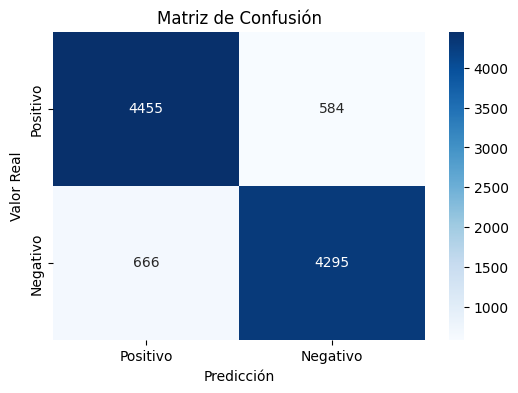

In [31]:
# 8. 🔍 Matriz de Confusión + Gráfico
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=['positivo', 'negativo'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'])

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

**Resumen de Resultados del Modelo**

Accuracy (Precisión global): 87.5%
El modelo clasifica correctamente el 87.5% de los comentarios.

Precision (para clase "positivo"): 86.99%
De todos los que el modelo predijo como positivos, el 86.99% realmente lo eran. Es útil para evitar falsos positivos.

Recall (para clase "positivo"): 88.41%
De todos los que realmente eran positivos, el modelo recuperó correctamente el 88.41%. Es útil para evitar falsos negativos.

F1-Score (balance entre precisión y recall): 87.7%
Buen equilibrio entre precisión y sensibilidad en la clase positiva.

**Matriz de Confusión**

VP (Positivos bien clasificados): 4455

FN (Positivos mal clasificados como negativos): 584

VN (Negativos bien clasificados): 4295

FP (Negativos mal clasificados como positivos): 666

El modelo comete errores, pero predomina la clasificación correcta.


El modelo de Regresión Logística tiene un buen desempeño general. Predice con alta precisión tanto los comentarios positivos como los negativos. Si bien comete errores, predomina la clasificaciòn correcta.
